In [3]:
# Numerical Operations
import math
import numpy as np

# Reading/Writing Data
import pandas as pd
import os
import csv

# For Progress Bar
from tqdm import tqdm

# Pytorch
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split

# For plotting learning curve
#from torch.utils.tensorboard import SummaryWriter

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances


In [4]:
pd.set_option('display.max_columns', None)
#pd.reset_option('display.max_columns')

In [5]:
import os
os.getcwd()

'/Users/linyinghsiao/Documents/GitHub/fraud-detection-E.SUN/preprocessing'

In [16]:
public = pd.read_csv('../datasets/dataset_1st/public_processed.csv') #'../' 用于表示当前目录的上一级目录。
data = pd.read_csv('../datasets/dataset_1st/training.csv')


按照比例分資料合併


In [9]:
# 分别设置正常和欺诈样本的数量
n_normal = 30000
n_fraud = 111

# 分别从正常和欺诈样本中抽取
normal_samples = train[train['label'] == 0].sample(n=n_normal, random_state=1)  # 随机种子为了复现结果
fraud_samples = train[train['label'] == 1].sample(n=n_fraud, random_state=1)

# 合并抽取的样本
sampled_data = pd.concat([normal_samples, fraud_samples])

# 查看抽样结果
print(sampled_data)

sampled_data.to_csv('../datasets/dataset_1st/chatgpt_output.csv', index=False)

                                                     txkey  locdt   loctm  \
1460410  ee984d199bd20d4f66179ba258d95a0d23e250dfc1e2b5...     32  163654   
4655606  b4fd40c529fdd5ecb77ede198830726d1b22a307c36b7c...     43  130338   
1109887  889b79652dd0b1b194f1c966ff8fdd31503206852a503b...     13  153337   
967459   d51c0f8a8c78ecf416c594520b34a7b7b791dcb5cb615d...     18  130617   
982336   c044d2900f3ea8164f8d23d019afbaf84ee0ac4d92aafc...     35  125644   
...                                                    ...    ...     ...   
5076350  b1be2b3bb753cf3672f00f4d3035863b86e7e87e8b6385...     18  123629   
3455471  4411bc915ca9c9e908f6ff87ffc23d1d30b6161c857c91...     16  175255   
8116725  354a5bd8916a81d5b78b0b3a757324e60c1ff90594bead...      9  203523   
1655955  b7d1ccd9284b4aa21812de6412fef015637043b58e3a9a...      4  201850   
7217928  b9a34b14893fbe4aadb7aa143cf471efee87503d8b0602...     41  113347   

                                                      chid  \
1460410  07ae


ＥＤＡ

In [7]:
df = pd.concat([public,data])
df.head()

,txkey,locdt,loctm,chid,cano,contp,etymd,mchno,acqic,mcc,conam,ecfg,insfg,iterm,bnsfg,flam1,stocn,scity,stscd,ovrlt,flbmk,hcefg,csmcu,csmam,flg_3dsmk,label
0,a2c1209018e4e52e04f6fabb48f05f1b8bc09dc838ff6c...,56,105157,d6d145d0d058e3f63b9ec421cf9e1543b0c3e059d18c2c...,9c454e0cf3680075b0382394ca59b00ee9435fd829da29...,4,1.0,8be206f97d10b57a46ea0ef5527155a0f9b48d16255b70...,2a608b081c09492bd2bc96d7def5371c4bc9cabf324a98...,272.0,1353.00,0,1,3.0,0,1349,0.0,15759.0,NaN,0,0,6.0,70.0,1349,0,NaN
1,16c4880500059e01553789be11bbb50753b7acaae7b95b...,56,185520,b599fb83473599fa2df4a04136a668c28df7914293f1da...,9f097cba6a70333c906904ebaad438356cf75b6abf5dd4...,5,8.0,dd280b4f35a02701142ba7de47abb9736deca3eed86474...,46f63555d29f177290dfe20e989146fb033e453f1d5ff3...,320.0,305.00,1,0,0.0,0,306,0.0,13451.0,NaN,0,0,6.0,70.0,306,0,NaN
2,623c56be3bee87724e3d119c271d9ed098eeda84233183...,59,102312,8de197129150d454df1639e9743c1aa11b1c1122a2010c...,439691cb167b272661c2eb9073124f5d422f446b0f92fb...,5,1.0,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,494.0,20.00,0,0,0.0,0,20,0.0,15759.0,NaN,0,0,NaN,NaN,0,0,NaN
3,250da12187059cf6e3a3066656a2919d08ceb8207efd55...,58,230138,f9cbad08a76f1dd9736a4fc51255eb55637ec0a417a406...,992679b728784192c17e90939918cbfae32ad1222fad26...,5,5.0,bd2b3523b4ecd652445b75ea7583c92f6f02af3971251b...,70dac5b1dfde828f556a93321a649df72891db35430588...,272.0,8371.00,1,0,0.0,0,8339,42.0,12381.0,NaN,0,0,6.0,70.0,8339,0,NaN
4,4b268e0da036f44cbbb056ddfac6a28ea336d9cf299843...,59,101937,27d235e691a425098f291105f78f9877e05bb75e1f132b...,763fd2a91420f9b632c378ca82ff9e318851fa1964cbba...,5,5.0,156987f72b8993b8c5a898fa76f3b8e6454e10e18aa238...,89b1654aaef0b65b1868004cfdce2dcbb67f15b7fba535...,217.0,163.69,1,0,0.0,0,163,126.0,14786.0,NaN,0,0,6.0,68.0,5,0,NaN


In [17]:

# Display the first few rows of the dataset and its summary
data.head(), data.describe(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8688526 entries, 0 to 8688525
Data columns (total 26 columns):
 #   Column     Dtype  
---  ------     -----  
 0   txkey      object 
 1   locdt      int64  
 2   loctm      int64  
 3   chid       object 
 4   cano       object 
 5   contp      int64  
 6   etymd      float64
 7   mchno      object 
 8   acqic      object 
 9   mcc        float64
 10  conam      float64
 11  ecfg       int64  
 12  insfg      int64  
 13  iterm      float64
 14  bnsfg      int64  
 15  flam1      int64  
 16  stocn      float64
 17  scity      float64
 18  stscd      float64
 19  ovrlt      int64  
 20  flbmk      int64  
 21  hcefg      float64
 22  csmcu      float64
 23  csmam      int64  
 24  flg_3dsmk  int64  
 25  label      int64  
dtypes: float64(9), int64(12), object(5)
memory usage: 1.7+ GB


(                                               txkey  locdt   loctm  \
 0  1c09727c939eb69ead2a4ce4072b8aa18992a64f01fcb4...     46  101812   
 1  2043f245a93bc6328dac964d6dbc89f13a0346062c194d...     17   85509   
 2  e4853710290a8409279f3279f8032ae670824bd19aa173...     44  212641   
 3  74d811b1dbc28b22b73ba2c79bb6033791d913b6d27a25...     42  102702   
 4  68ca182343969d429d79a34e532bc1ca7a3cc032c2ad81...     31  185737   
 
                                                 chid  \
 0  84d2dc85d4da6a7fa284a11a4290d7e9a969163dcb4d82...   
 1  9a8cf5d0afd729cb7876f6b3172152c7c9c6fabd40515c...   
 2  dcc1389a5765d6f53152cf85970fbe78a83fd3d1c299b0...   
 3  577f2329d1eccd59ba0abaf6113bb78dcd575badcbc57f...   
 4  fff6b4126c40620b1fbb11d4de02cd67b9e95071caa40b...   
 
                                                 cano  contp  etymd  \
 0  3dd5bf1e29e5e0baa789ce692fe5dbd34ff05173acf351...      5    1.0   
 1  8cb13f9b38c7bbc02d210e580dcbbcbb6c95bf18bc3320...      5    8.0   
 2  1ec32

In [18]:
# Identify potential categorical variables based on the number of unique values
# Typically, if a numeric column has relatively few unique values, it might be categorical.

# Getting the number of unique values for each column
unique_counts = data.nunique().sort_values()

# Filtering out columns that likely represent categorical data (arbitrarily choosing < 100 unique values as a threshold)
potential_categorical_cols = unique_counts[unique_counts < 100].index.tolist()

# Displaying the number of unique values for potential categorical columns
unique_counts[potential_categorical_cols]


insfg         2
flbmk         2
ovrlt         2
bnsfg         2
flg_3dsmk     2
ecfg          2
label         2
stscd         5
contp         7
etymd        10
hcefg        11
iterm        14
locdt        56
csmcu        79
dtype: int64

In [19]:
# Checking the number of missing values in each column
missing_values = data.isnull().sum()
missing_values


txkey              0
locdt              0
loctm              0
chid               0
cano               0
contp              0
etymd         203455
mchno              0
acqic              0
mcc             4550
conam              0
ecfg               0
insfg              0
iterm              0
bnsfg              0
flam1              0
stocn            600
scity         266066
stscd        8665195
ovrlt              0
flbmk              0
hcefg         286656
csmcu         498657
csmam              0
flg_3dsmk          0
label              0
dtype: int64

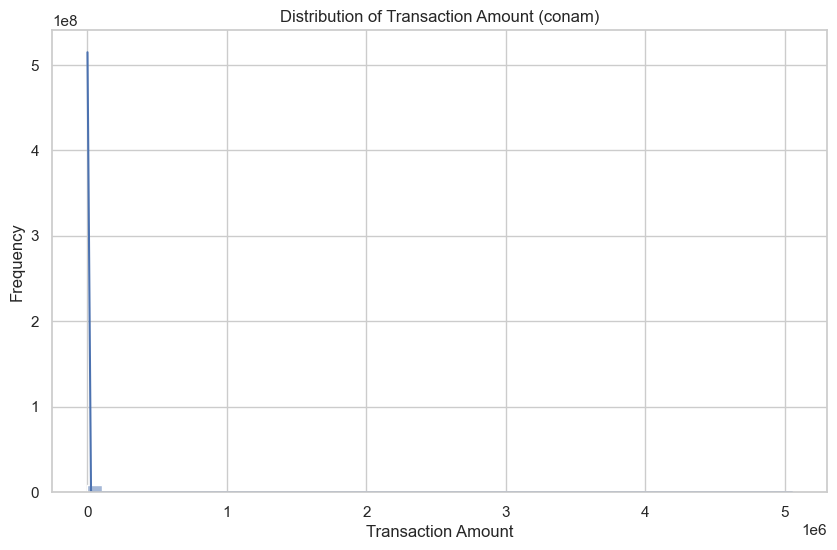

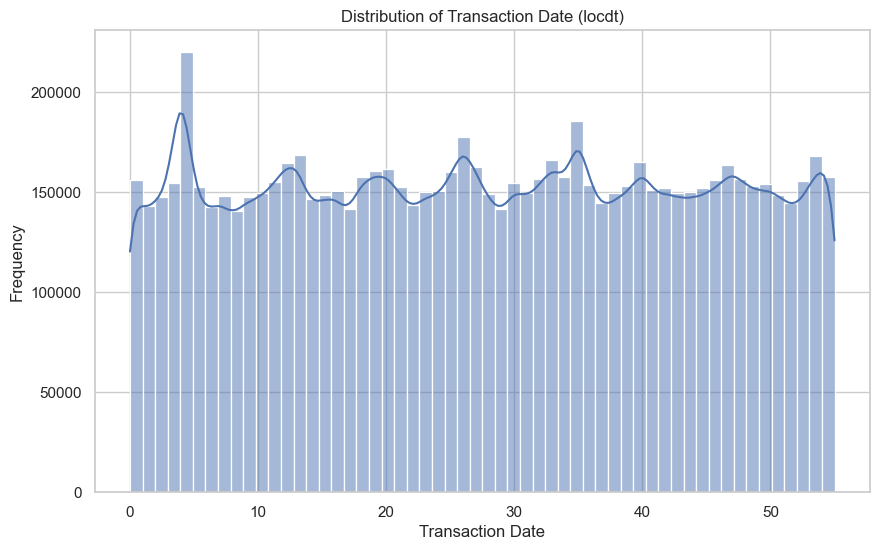

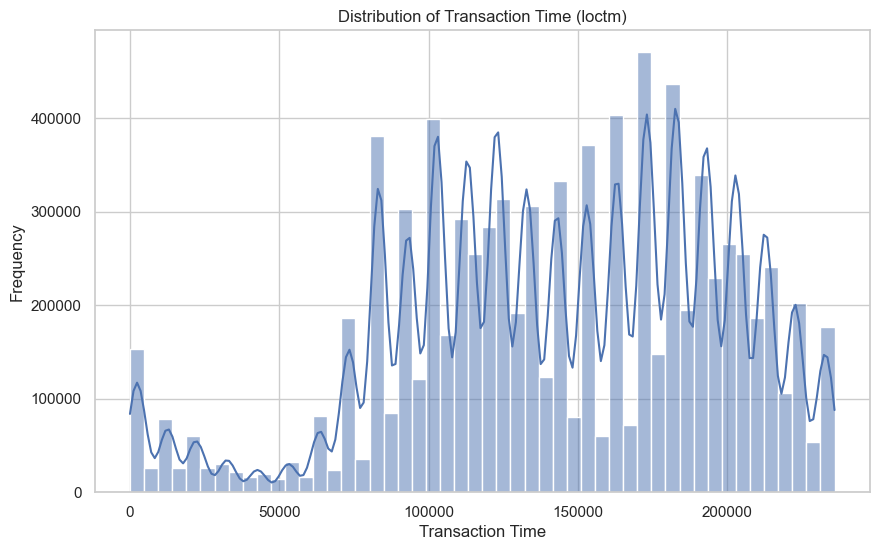

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting the distribution of 'conam' (Transaction Amount)
plt.figure(figsize=(10, 6))
sns.histplot(data['conam'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount (conam)')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# Plotting the distribution of 'locdt' (Transaction Date)
plt.figure(figsize=(10, 6))
sns.histplot(data['locdt'], bins=56, kde=True)
plt.title('Distribution of Transaction Date (locdt)')
plt.xlabel('Transaction Date')
plt.ylabel('Frequency')
plt.show()

# Plotting the distribution of 'loctm' (Transaction Time)
plt.figure(figsize=(10, 6))
sns.histplot(data['loctm'], bins=50, kde=True)
plt.title('Distribution of Transaction Time (loctm)')
plt.xlabel('Transaction Time')
plt.ylabel('Frequency')
plt.show()


交易金額 (conam): 大多數交易集中在相對較低的金額範圍內，但有一些極端值，這些極端值可能代表大筆交易。

交易日期 (locdt): 數據集中的交易日期似乎相對均勻分布，沒有明顯的突出峰值。

交易時間 (loctm): 交易時間的分布看起來相當均勻，但在某些特定時間有輕微的峰值。

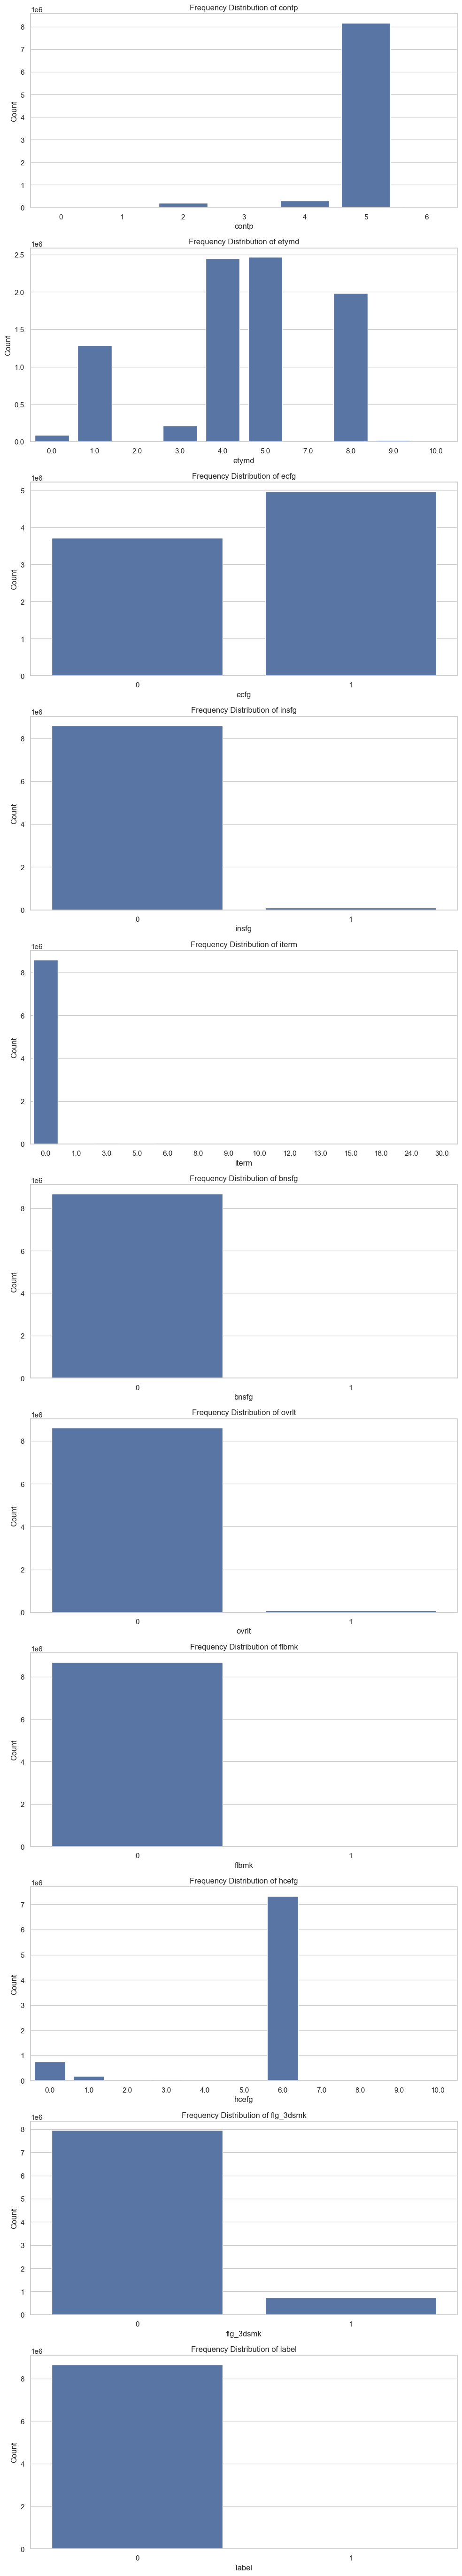

In [21]:
# Selecting categorical columns for frequency distribution analysis
categorical_columns = ['contp', 'etymd', 'ecfg', 'insfg', 'iterm', 'bnsfg', 'ovrlt', 'flbmk', 'hcefg', 'flg_3dsmk', 'label']

# Setting up the plot
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(10, 5 * len(categorical_columns)))

# Plotting frequency distributions for each categorical column
for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=data, ax=axes[i])
    axes[i].set_title(f'Frequency Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


contp (合約類型): 大部分數據集中在某幾個特定的類型。
etymd (交易類型): 某些交易類型比其他類型更常見。
ecfg (電子通道標記): 有兩種類型，其中一種類型的頻率明顯較高。
insfg (分期付款標記): 絕大多數交易都不是分期付款。
iterm (分期期數): 大多數交易沒有分期，但有少數幾個分期期數的交易。
bnsfg (紅利標記): 絕大多數交易都沒有紅利。
ovrlt (逾期標記): 絕大多數交易都沒有逾期。
flbmk (不良標記): 幾乎所有交易都沒有不良標記。
hcefg (硬件配置): 有幾種不同的配置，但某些配置的頻率顯著高於其他配置。
flg_3dsmk (3DS標記): 大部分交易都沒有3DS標記。
label (目標標籤): 絕大多數交易被標記為同一類型。
這些分布有助於我們理解數據集中的不同類別特徵的行為和特點。例如，label列的分布表明數據集可能非常不平衡

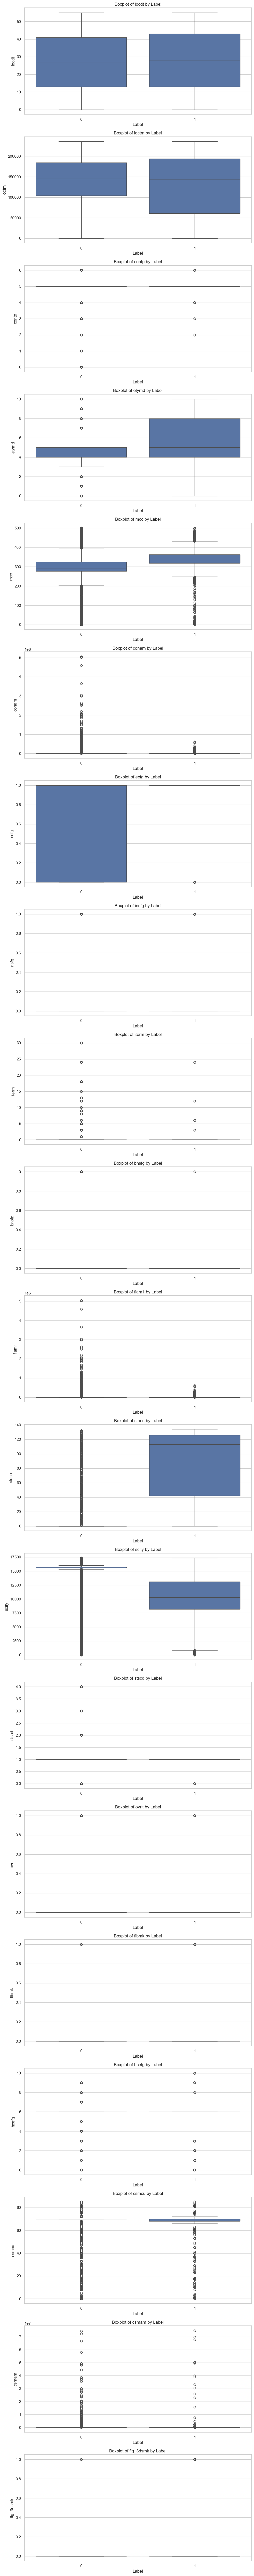

In [22]:
# Analyzing the relationship between the target variable 'label' and other features
# We will create boxplots for numeric features and count plots for categorical features

numeric_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_features.remove('label')  # Removing the target variable

# Setting up the plot
fig, axes = plt.subplots(nrows=len(numeric_features), ncols=1, figsize=(10, 5 * len(numeric_features)))

# Plotting boxplots for each numeric feature against the target variable
for i, col in enumerate(numeric_features):
    sns.boxplot(x='label', y=col, data=data, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} by Label')
    axes[i].set_xlabel('Label')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()


這些盒形圖展示了數值特徵與目標變量label之間的關係：

對於大多數數值特徵，不同label類別的分佈有所不同。這可能意味著這些特徵對於預測label是有用的。
在一些特徵中，如conam（交易金額），可以看到不同label值的數據分佈明顯不同，這表明這些特徵可能對於分辨不同的label類別特別重要。
一些特徵顯示出對於不同label值有重疊的數據分佈，這可能意味著這些特徵對於預測label可能不是特別有用，或者需要與其他特徵結合使用。

In [23]:
# Re-checking the number of missing values in each column
missing_values = data.isnull().sum()
missing_values[missing_values > 0]  # Filter columns that have missing values


etymd     203455
mcc         4550
stocn        600
scity     266066
stscd    8665195
hcefg     286656
csmcu     498657
dtype: int64

我們將從填充缺失值較少的列開始。對於mcc和stocn，我將使用中位數來填充缺失值，因為它們對於數值型數據來說是一個穩健的選擇。對於etymd、scity、hcefg和csmcu，由於缺失值較多，我們可能需要更謹慎地處理。對於stscd，由於缺失值非常多，我們可能需要考慮刪除這個列。

In [24]:
# Filling missing values for 'mcc' and 'stocn' with their median values
data['mcc'].fillna(data['mcc'].median(), inplace=True)
data['stocn'].fillna(data['stocn'].median(), inplace=True)

# Re-checking if the missing values are filled for these columns
missing_values_updated = data[['mcc', 'stocn']].isnull().sum()
missing_values_updated


mcc      0
stocn    0
dtype: int64

In [25]:
# Filling missing values for 'etymd', 'scity', 'hcefg', and 'csmcu' with their mode (most frequent value)
for col in ['etymd', 'scity', 'hcefg', 'csmcu']:
    mode_value = data[col].mode()[0]
    data[col].fillna(mode_value, inplace=True)

# Re-checking if the missing values are filled for these columns
missing_values_updated = data[['etymd', 'scity', 'hcefg', 'csmcu']].isnull().sum()
missing_values_updated


etymd    0
scity    0
hcefg    0
csmcu    0
dtype: int64

In [26]:
# Dropping the column 'stscd' due to a large number of missing values
data.drop(columns=['stscd'], inplace=True)

# Checking the current shape of the dataframe to confirm the column is dropped
data.shape


(8688526, 25)

對具有少量唯一值的類別特徵進行了One-Hot編碼。

In [27]:
# Identifying categorical columns with a small number of unique values for One-Hot encoding
categorical_cols = data.select_dtypes(include=['object']).columns
low_cardinality_cols = [col for col in categorical_cols if data[col].nunique() < 10]

# Performing One-Hot encoding on these columns
data_encoded = pd.get_dummies(data, columns=low_cardinality_cols, drop_first=True)

# Displaying the first few rows of the new dataframe
data_encoded.head()


,txkey,locdt,loctm,chid,cano,contp,etymd,mchno,acqic,mcc,conam,ecfg,insfg,iterm,bnsfg,flam1,stocn,scity,ovrlt,flbmk,hcefg,csmcu,csmam,flg_3dsmk,label
0,1c09727c939eb69ead2a4ce4072b8aa18992a64f01fcb4...,46,101812,84d2dc85d4da6a7fa284a11a4290d7e9a969163dcb4d82...,3dd5bf1e29e5e0baa789ce692fe5dbd34ff05173acf351...,5,1.0,cad752c5d05d2bdcc30d64fa4e68404c2d1f7be5d14d52...,8f6b3ff512a001e0d1988c6cd888ef8c74112fb71117e5...,375.0,1524.0,0,0,0.0,0,1529,0.0,15759.0,0,0,6.0,70.0,1529,0,0
1,2043f245a93bc6328dac964d6dbc89f13a0346062c194d...,17,85509,9a8cf5d0afd729cb7876f6b3172152c7c9c6fabd40515c...,8cb13f9b38c7bbc02d210e580dcbbcbb6c95bf18bc3320...,5,8.0,4356c6642ef6e837543b577c7ee3ffa92b4b8fcfb57254...,379166ff4a62dac343b4b734188aa618716cc496e48b65...,282.0,101.0,1,0,0.0,0,101,0.0,15759.0,0,0,8.0,70.0,101,0,0
2,e4853710290a8409279f3279f8032ae670824bd19aa173...,44,212641,dcc1389a5765d6f53152cf85970fbe78a83fd3d1c299b0...,1ec32868e5e1d5ff8df56737c2a91326cbfe3364382de6...,5,4.0,5b7eff061f8896aac4339ea35c25f8bb956a43bc486460...,8f6b3ff512a001e0d1988c6cd888ef8c74112fb71117e5...,288.0,117.0,0,0,0.0,0,116,0.0,15759.0,0,0,6.0,70.0,116,0,0
3,74d811b1dbc28b22b73ba2c79bb6033791d913b6d27a25...,42,102702,577f2329d1eccd59ba0abaf6113bb78dcd575badcbc57f...,4359dca1ac6a835eceb2bc0dd6b0b710f030c3499126e9...,5,1.0,cad752c5d05d2bdcc30d64fa4e68404c2d1f7be5d14d52...,36684976be1f529e6e2a32c9edab4cf8e364b2b916ae2c...,375.0,1676.0,0,0,0.0,0,1683,0.0,15759.0,0,0,6.0,70.0,1683,0,0
4,68ca182343969d429d79a34e532bc1ca7a3cc032c2ad81...,31,185737,fff6b4126c40620b1fbb11d4de02cd67b9e95071caa40b...,a3837f2905383f235a72679482c5f02e40f2a8ca29750d...,5,5.0,50d5b02ce3fc88723438c2a29cfdb04be4a1a11280ddb6...,379166ff4a62dac343b4b734188aa618716cc496e48b65...,406.0,14.0,1,0,0.0,0,14,0.0,15759.0,0,0,6.0,70.0,14,0,0


對數值特徵進行標準化 時間不行

In [28]:
from sklearn.preprocessing import StandardScaler

# Identifying numeric columns for standardization
numeric_cols = data_encoded.select_dtypes(include=['float64', 'int64']).columns

# Standardizing the numeric columns
scaler = StandardScaler()
data_encoded[numeric_cols] = scaler.fit_transform(data_encoded[numeric_cols])

# Displaying the first few rows of the standardized dataframe
data_encoded.head()


,txkey,locdt,loctm,chid,cano,contp,etymd,mchno,acqic,mcc,conam,ecfg,insfg,iterm,bnsfg,flam1,stocn,scity,ovrlt,flbmk,hcefg,csmcu,csmam,flg_3dsmk,label
0,1c09727c939eb69ead2a4ce4072b8aa18992a64f01fcb4...,1.143988,-0.766986,84d2dc85d4da6a7fa284a11a4290d7e9a969163dcb4d82...,3dd5bf1e29e5e0baa789ce692fe5dbd34ff05173acf351...,0.199356,-1.665839,cad752c5d05d2bdcc30d64fa4e68404c2d1f7be5d14d52...,8f6b3ff512a001e0d1988c6cd888ef8c74112fb71117e5...,0.840020,0.011065,-1.156012,-0.10344,-0.082657,-0.035698,0.011641,-0.299953,0.468513,-0.099185,-0.01749,0.340491,0.080577,-0.011778,-0.30539,-0.060828
1,2043f245a93bc6328dac964d6dbc89f13a0346062c194d...,-0.649310,-1.069962,9a8cf5d0afd729cb7876f6b3172152c7c9c6fabd40515c...,8cb13f9b38c7bbc02d210e580dcbbcbb6c95bf18bc3320...,0.199356,1.468153,4356c6642ef6e837543b577c7ee3ffa92b4b8fcfb57254...,379166ff4a62dac343b4b734188aa618716cc496e48b65...,-0.514871,-0.138430,0.865043,-0.10344,-0.082657,-0.035698,-0.138396,-0.299953,0.468513,-0.099185,-0.01749,1.426549,0.080577,-0.024940,-0.30539,-0.060828
2,e4853710290a8409279f3279f8032ae670824bd19aa173...,1.020312,1.292667,dcc1389a5765d6f53152cf85970fbe78a83fd3d1c299b0...,1ec32868e5e1d5ff8df56737c2a91326cbfe3364382de6...,0.199356,-0.322699,5b7eff061f8896aac4339ea35c25f8bb956a43bc486460...,8f6b3ff512a001e0d1988c6cd888ef8c74112fb71117e5...,-0.427458,-0.136749,-1.156012,-0.10344,-0.082657,-0.035698,-0.136820,-0.299953,0.468513,-0.099185,-0.01749,0.340491,0.080577,-0.024802,-0.30539,-0.060828
3,74d811b1dbc28b22b73ba2c79bb6033791d913b6d27a25...,0.896636,-0.750446,577f2329d1eccd59ba0abaf6113bb78dcd575badcbc57f...,4359dca1ac6a835eceb2bc0dd6b0b710f030c3499126e9...,0.199356,-1.665839,cad752c5d05d2bdcc30d64fa4e68404c2d1f7be5d14d52...,36684976be1f529e6e2a32c9edab4cf8e364b2b916ae2c...,0.840020,0.027033,-1.156012,-0.10344,-0.082657,-0.035698,0.027821,-0.299953,0.468513,-0.099185,-0.01749,0.340491,0.080577,-0.010359,-0.30539,-0.060828
4,68ca182343969d429d79a34e532bc1ca7a3cc032c2ad81...,0.216420,0.792682,fff6b4126c40620b1fbb11d4de02cd67b9e95071caa40b...,a3837f2905383f235a72679482c5f02e40f2a8ca29750d...,0.199356,0.125014,50d5b02ce3fc88723438c2a29cfdb04be4a1a11280ddb6...,379166ff4a62dac343b4b734188aa618716cc496e48b65...,1.291651,-0.147569,0.865043,-0.10344,-0.082657,-0.035698,-0.147537,-0.299953,0.468513,-0.099185,-0.01749,0.340491,0.080577,-0.025742,-0.30539,-0.060828


In [29]:
# Converting 'loctm' to a string and padding with zeros to ensure HHMMSS format
data['loctm'] = data['loctm'].astype(str).str.zfill(6)

# Converting 'loctm' to a datetime object to extract hours and minutes
data['loctm'] = pd.to_datetime(data['loctm'], format='%H%M%S').dt.time

# Extracting hours and minutes from 'loctm'
data['hour'] = data['loctm'].apply(lambda x: x.hour)
data['minute'] = data['loctm'].apply(lambda x: x.minute)

# Dropping the original 'loctm' column
data.drop(columns=['loctm'], inplace=True)

# Displaying the first few rows of the dataframe with new features
data.head()


,txkey,locdt,chid,cano,contp,etymd,mchno,acqic,mcc,conam,ecfg,insfg,iterm,bnsfg,flam1,stocn,scity,ovrlt,flbmk,hcefg,csmcu,csmam,flg_3dsmk,label,hour,minute
0,1c09727c939eb69ead2a4ce4072b8aa18992a64f01fcb4...,46,84d2dc85d4da6a7fa284a11a4290d7e9a969163dcb4d82...,3dd5bf1e29e5e0baa789ce692fe5dbd34ff05173acf351...,5,1.0,cad752c5d05d2bdcc30d64fa4e68404c2d1f7be5d14d52...,8f6b3ff512a001e0d1988c6cd888ef8c74112fb71117e5...,375.0,1524.0,0,0,0.0,0,1529,0.0,15759.0,0,0,6.0,70.0,1529,0,0,10,18
1,2043f245a93bc6328dac964d6dbc89f13a0346062c194d...,17,9a8cf5d0afd729cb7876f6b3172152c7c9c6fabd40515c...,8cb13f9b38c7bbc02d210e580dcbbcbb6c95bf18bc3320...,5,8.0,4356c6642ef6e837543b577c7ee3ffa92b4b8fcfb57254...,379166ff4a62dac343b4b734188aa618716cc496e48b65...,282.0,101.0,1,0,0.0,0,101,0.0,15759.0,0,0,8.0,70.0,101,0,0,8,55
2,e4853710290a8409279f3279f8032ae670824bd19aa173...,44,dcc1389a5765d6f53152cf85970fbe78a83fd3d1c299b0...,1ec32868e5e1d5ff8df56737c2a91326cbfe3364382de6...,5,4.0,5b7eff061f8896aac4339ea35c25f8bb956a43bc486460...,8f6b3ff512a001e0d1988c6cd888ef8c74112fb71117e5...,288.0,117.0,0,0,0.0,0,116,0.0,15759.0,0,0,6.0,70.0,116,0,0,21,26
3,74d811b1dbc28b22b73ba2c79bb6033791d913b6d27a25...,42,577f2329d1eccd59ba0abaf6113bb78dcd575badcbc57f...,4359dca1ac6a835eceb2bc0dd6b0b710f030c3499126e9...,5,1.0,cad752c5d05d2bdcc30d64fa4e68404c2d1f7be5d14d52...,36684976be1f529e6e2a32c9edab4cf8e364b2b916ae2c...,375.0,1676.0,0,0,0.0,0,1683,0.0,15759.0,0,0,6.0,70.0,1683,0,0,10,27
4,68ca182343969d429d79a34e532bc1ca7a3cc032c2ad81...,31,fff6b4126c40620b1fbb11d4de02cd67b9e95071caa40b...,a3837f2905383f235a72679482c5f02e40f2a8ca29750d...,5,5.0,50d5b02ce3fc88723438c2a29cfdb04be4a1a11280ddb6...,379166ff4a62dac343b4b734188aa618716cc496e48b65...,406.0,14.0,1,0,0.0,0,14,0.0,15759.0,0,0,6.0,70.0,14,0,0,18,57


數值特徵標準化:

對數值特徵進行標準化或歸一化，特別是當使用基於距離的模型（如KNN或SVM）時。
特徵構造:

基於現有數據創建新特徵。例如，從loctm（交易時間）中提取小時、分鐘和秒。
創建交互特徵，反映兩個或多個變量之間的關係。
異常值處理:

識別並處理異常值，特別是對於數值特徵如conam（交易金額）。
特徵選擇:

使用特徵選擇技術（如基於模型的特徵重要性、迴歸係數等）來剔除不重要的特徵。
時間特徵處理:

如果locdt（交易日期）是一個重要特徵，考慮將其轉換為星期幾或是否為假日等。

In [2]:
from preprocessing.data_preprocess import FeatureEdition
sampled_data = pd.read_csv("datasets/train_sample.csv")
data_info = pd.read_excel("datasets/31_資料欄位說明.xlsx")
trans_feat  = FeatureEdition( sampled_data, data_info)
trans_feat.trans_cata2objcet(['ecfg_3dsmk','new_stocn','new_scity','weekday'])
sampled_data.to_csv('datasets/train_sample.csv', index=False)

ModuleNotFoundError: No module named 'preprocessing'

In [1]:
import os
print(os.getcwd())


/Users/linyinghsiao/Documents/GitHub/fraud-detection-E.SUN/preprocessing


只抓盜刷資料

In [5]:
data = pd.read_csv("/Users/linyinghsiao/Documents/GitHub/fraud-detection-E.SUN/datasets/new_train.csv")

# 欺诈样本中
fraud_all = data[data['label'] == 1]

# 查看结果
print(fraud_all)


                                                     txkey  locdt   loctm  \
318      7773d6012a013a75d57891ba6dd96f464e04720b9d699c...      0  190457   
339      cded61d4f4c719c1a418e8348509763f1591b6f7f7d3f7...     49  204814   
881      78bcabfbe831b5057b5be29501e50c3e95a0f777146f8c...     19   43049   
1576     8722c91641e9c08e31fd94bf094be60f6bc10df05c6b84...     47  213335   
1598     21c86f81f00a2aa393f649a1b189254b89d8c5afa292b3...     14  213413   
...                                                    ...    ...     ...   
8686800  d00b17a3c71c968e7ff511fe1c0b2915a72aacab5a3e04...     48   33914   
8686969  459a285e001dfed37e213fcd9a2b46373796a686ad4ab5...     26  100301   
8687406  d445af80114da7348d32dfcf0cef49d2fdfee3effdaa36...     14   95753   
8687798  179f57a3ca3a9a7f629162322d97a34655fdb34ea9963d...     44   63707   
8688516  566b990ac3203d04a540514bfb564015ed17efdf12bfee...     12  134521   

                                                      chid  \
318      daa8

In [6]:
fraud_all.to_csv('/Users/linyinghsiao/Downloads/fraud_all.csv', index=False)

In [7]:
# 分别设置正常和欺诈样本的数量
normal_all = data[data['label'] == 0]
n_normal = 5000

# 分别从正常和欺诈样本中抽取
normal_all = data[data['label'] == 0].sample(n=n_normal, random_state=1)  # 随机种子为了复现结果


# 合并抽取的样本
sampled_data = pd.concat([normal_all, fraud_all])

# 查看抽样结果
print(sampled_data)

sampled_data.to_csv('/Users/linyinghsiao/Downloads/sampled_data.csv', index=False)

                                                     txkey  locdt   loctm  \
1460410  ee984d199bd20d4f66179ba258d95a0d23e250dfc1e2b5...     32  163654   
4655606  b4fd40c529fdd5ecb77ede198830726d1b22a307c36b7c...     43  130338   
1109887  889b79652dd0b1b194f1c966ff8fdd31503206852a503b...     13  153337   
967459   d51c0f8a8c78ecf416c594520b34a7b7b791dcb5cb615d...     18  130617   
982336   c044d2900f3ea8164f8d23d019afbaf84ee0ac4d92aafc...     35  125644   
...                                                    ...    ...     ...   
8686800  d00b17a3c71c968e7ff511fe1c0b2915a72aacab5a3e04...     48   33914   
8686969  459a285e001dfed37e213fcd9a2b46373796a686ad4ab5...     26  100301   
8687406  d445af80114da7348d32dfcf0cef49d2fdfee3effdaa36...     14   95753   
8687798  179f57a3ca3a9a7f629162322d97a34655fdb34ea9963d...     44   63707   
8688516  566b990ac3203d04a540514bfb564015ed17efdf12bfee...     12  134521   

                                                      chid  \
1460410  07ae